In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
import operator
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033


In [4]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7243,7246,7247,7247,7249,7252,7253,7255,7260,7262
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2820,2829,2841,2849,2855,2863,2870,2874,2880,2888
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5872,5873,5875,5878,5881,5883,5886,5890,5894,5899
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1664,1670,1678,1682,1685,1693,1695,1697,1701,1702


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/17/21', '10/18/21', '10/19/21', '10/20/21', '10/21/21', '10/22/21',
       '10/23/21', '10/24/21', '10/25/21', '10/26/21'],
      dtype='object', length=648)

In [7]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,0,0,0,0,0,0,0,0,0,0,...,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071
1,0,0,0,0,0,0,0,0,0,0,...,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610
2,0,0,0,0,0,0,0,0,0,0,...,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990
3,0,0,0,0,0,0,0,0,0,0,...,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425
4,0,0,0,0,0,0,0,0,0,0,...,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033


In [8]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
230,0,1,3,3,4,5,7,7,10,13,...,148178,150731,154725,158587,162026,165663,169261,172644,175818,179095


In [9]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,0,0,0,0,0,0,0,0,0,0,...,7243,7246,7247,7247,7249,7252,7253,7255,7260,7262
1,0,0,0,0,0,0,0,0,0,0,...,2820,2829,2841,2849,2855,2863,2870,2874,2880,2888
2,0,0,0,0,0,0,0,0,0,0,...,5872,5873,5875,5878,5881,5883,5886,5890,5894,5899
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1664,1670,1678,1682,1685,1693,1695,1697,1701,1702


In [10]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [12]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(244528642,
 4963082,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479663,
  542525,
  607435,
  677100,
  734000,
  799279,
  876098,
  958982,
  1042008,
  1126208,
  1185351,
  1256187,
  1330136,
  1399770,
  1483065,
  1570050,
  1655370,
  1729757,
  1849354,
  1920407,
  2004274,
  2082496,
  2178189,
  2266231,
  2343419,
  2420194,
  2495741,
  2571745,
  2653236,
  2737234,
  2821349,
  2903700,
  2975167,
  3045416,
  3121220,
  3198418,
  3281704,
  

In [13]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [14]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


In [15]:
singapore_cases

array([[     0],
       [     1],
       [     3],
       [     3],
       [     4],
       [     5],
       [     7],
       [     7],
       [    10],
       [    13],
       [    16],
       [    18],
       [    18],
       [    24],
       [    28],
       [    28],
       [    30],
       [    33],
       [    40],
       [    45],
       [    47],
       [    50],
       [    58],
       [    67],
       [    72],
       [    75],
       [    77],
       [    81],
       [    84],
       [    84],
       [    85],
       [    85],
       [    89],
       [    89],
       [    91],
       [    93],
       [    93],
       [    93],
       [   102],
       [   106],
       [   108],
       [   110],
       [   110],
       [   117],
       [   130],
       [   138],
       [   150],
       [   150],
       [   160],
       [   178],
       [   178],
       [   200],
       [   212],
       [   226],
       [   243],
       [   266],
       [   313],
       [   345],
       [   385

In [16]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [18]:
# visualisation with the latest data

latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      156071
 1      182610
 2      205990
 3       15425
 4       64033
         ...  
 274    896174
 275    451897
 276      9711
 277    209648
 278    132724
 Name: 10/26/21, Length: 279, dtype: int64,
 0       7262
 1       2888
 2       5899
 3        130
 4       1702
        ...  
 274    21802
 275     4644
 276     1858
 277     3660
 278     4674
 Name: 10/26/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 10/26/21, Length: 264, dtype: int64)

In [19]:
# create a list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [21]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 45627021 cases
India: 34215653 cases
Brazil: 21748984 cases
United Kingdom: 8894843 cases
Russia: 8185400 cases
Turkey: 7909081 cases
France: 7235100 cases
Iran: 5877456 cases
Argentina: 5283000 cases
Spain: 5004143 cases
Colombia: 4994014 cases
Italy: 4747773 cases
Germany: 4516839 cases
Indonesia: 4241090 cases
Mexico: 3784448 cases
Poland: 2982143 cases
Ukraine: 2933778 cases
South Africa: 2920109 cases
Philippines: 2765672 cases
Malaysia: 2442224 cases
Peru: 2197052 cases
Netherlands: 2133367 cases
Iraq: 2049240 cases
Thailand: 1866863 cases
Czechia: 1735552 cases
Japan: 1718165 cases
Canada: 1712581 cases
Chile: 1684608 cases
Romania: 1587880 cases
Bangladesh: 1568257 cases
Belgium: 1333947 cases
Israel: 1324897 cases
Pakistan: 1270322 cases
Sweden: 1168271 cases
Serbia: 1111957 cases
Portugal: 1086280 cases
Kazakhstan: 1011656 cases
Cuba: 947935 cases
Morocco: 944803 cases
Vietnam: 896174 cases
Switzerland: 865708 cases
Jordan: 854758 cas

In [22]:
# Find the list of unique provinces

# remove NaN
# unique_provinces =  list(confirmed_cases['Province/State'].unique())[1:]
unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [23]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for case in no_cases:
    unique_provinces.remove(case)

In [24]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 1741 cases
New South Wales: 74362 cases
Northern Territory: 225 cases
Queensland: 2086 cases
South Australia: 918 cases
Tasmania: 237 cases
Victoria: 83185 cases
Western Australia: 1112 cases
Alberta: 321210 cases
British Columbia: 202973 cases
Grand Princess: 13 cases
Manitoba: 62977 cases
New Brunswick: 6206 cases
Newfoundland and Labrador: 1964 cases
Northwest Territories: 1843 cases
Nova Scotia: 7272 cases
Nunavut: 674 cases
Ontario: 606288 cases
Prince Edward Island: 315 cases
Quebec: 423334 cases
Repatriated Travellers: 13 cases
Saskatchewan: 76607 cases
Yukon: 892 cases
Anhui: 1008 cases
Beijing: 1150 cases
Chongqing: 603 cases
Fujian: 1300 cases
Gansu: 255 cases
Guangdong: 3217 cases
Guangxi: 330 cases
Guizhou: 158 cases
Hainan: 190 cases
Hebei: 1321 cases
Heilongjiang: 1713 cases
Henan: 1555 cases
Hong Kong: 12330 cases
Hubei: 68305 cases
Hunan: 1197 cases
Inner Mongolia: 531 cases
Jiangsu: 1600 cases
Jiangxi: 937 cases
Jilin: 577 cases
Liaoning: 

In [25]:
# handling nan values if there is any

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

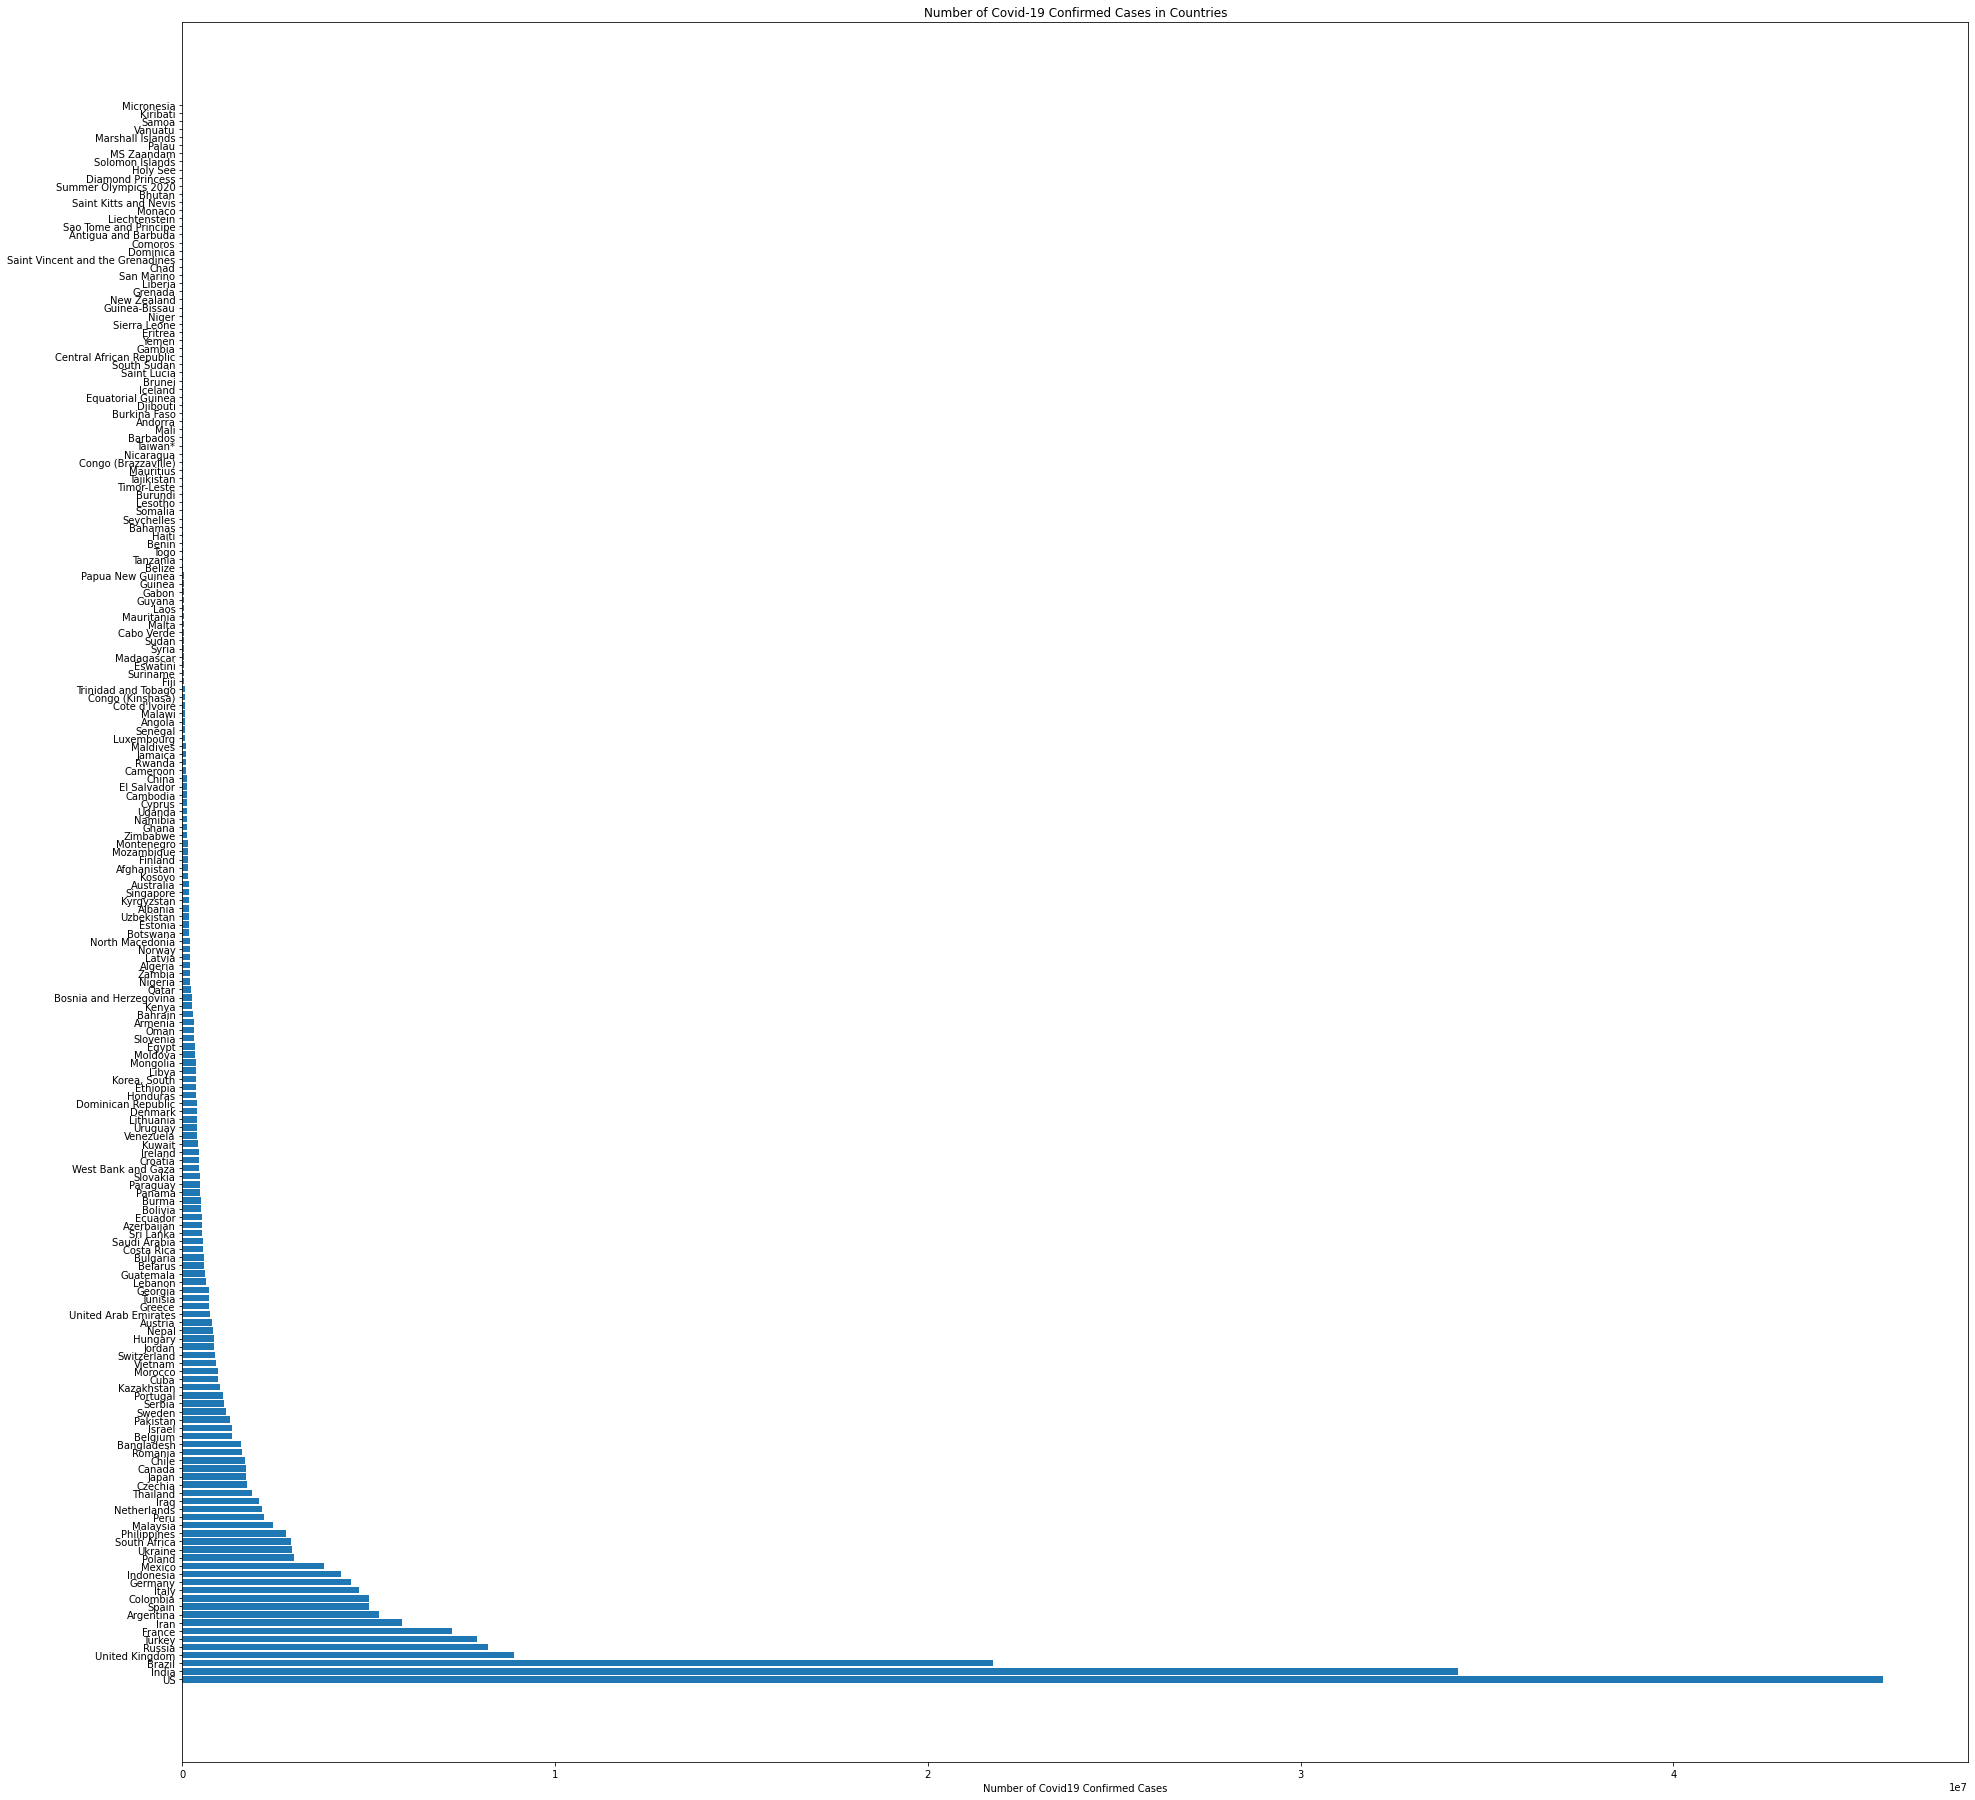

In [26]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [27]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

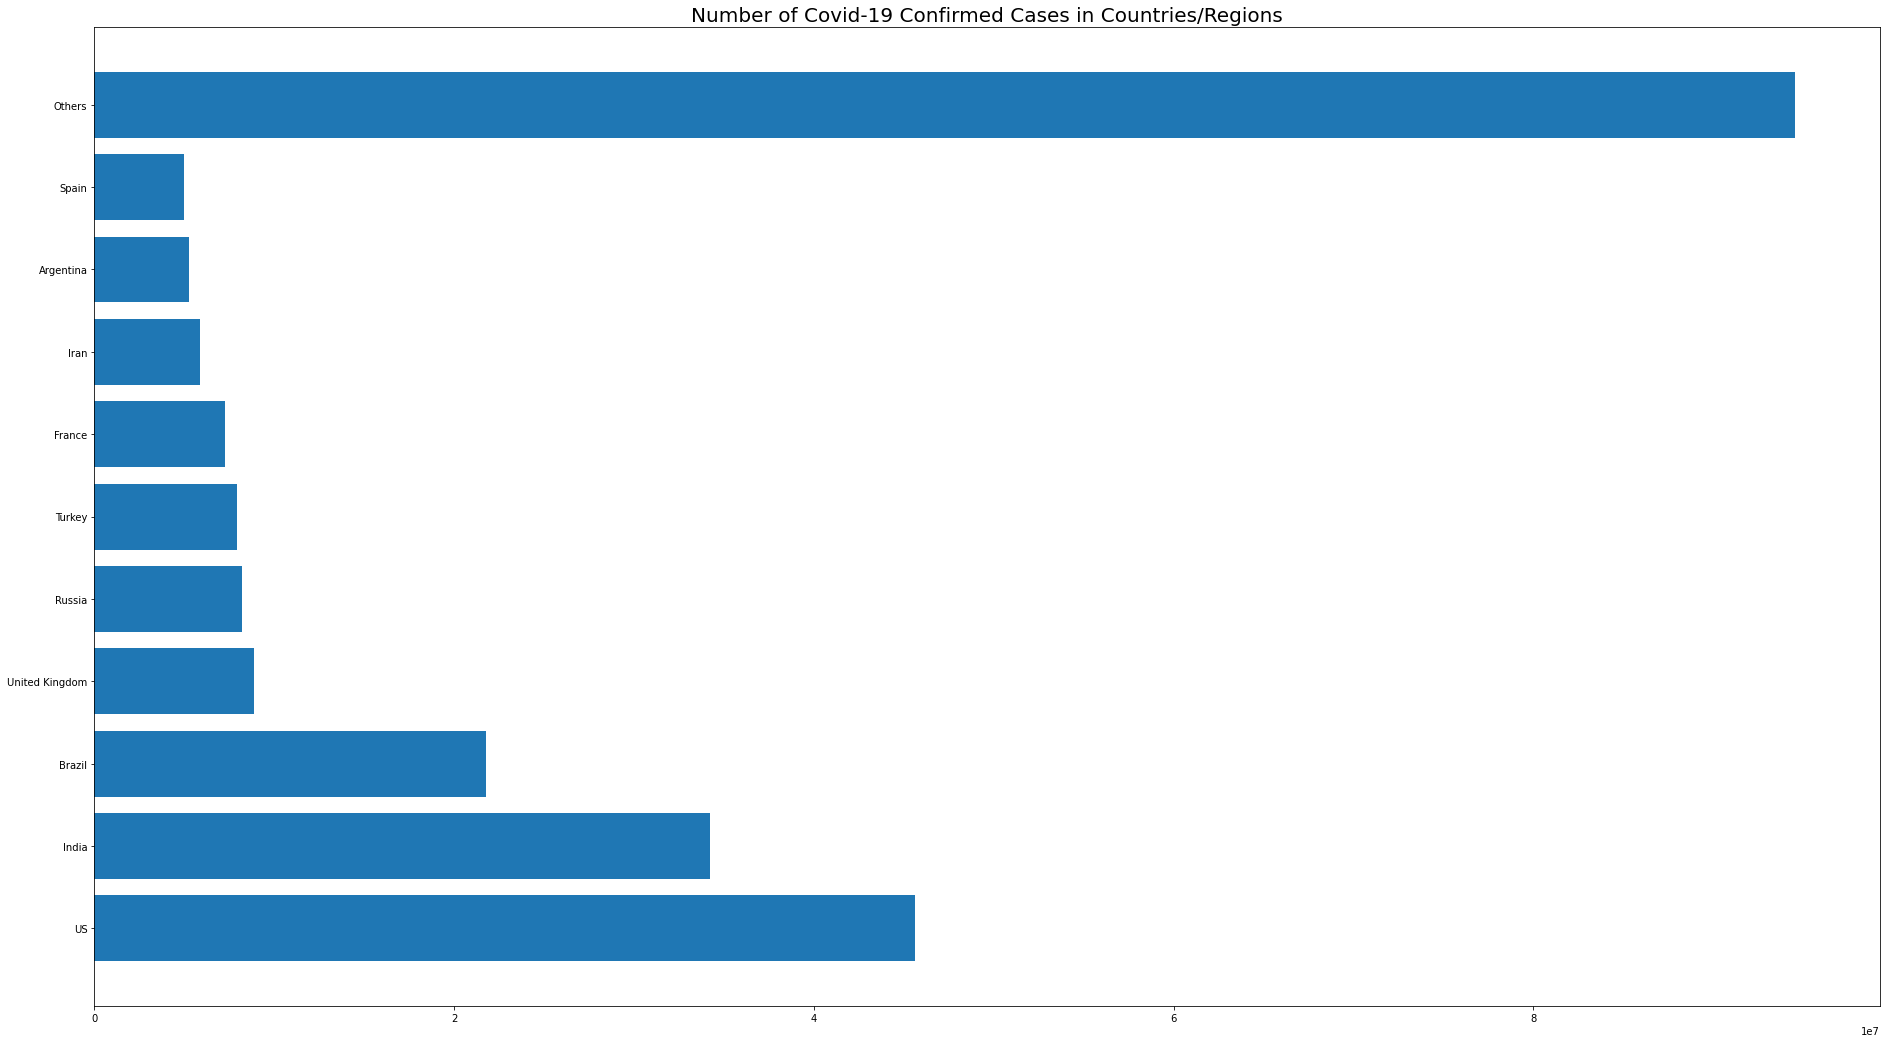

In [28]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

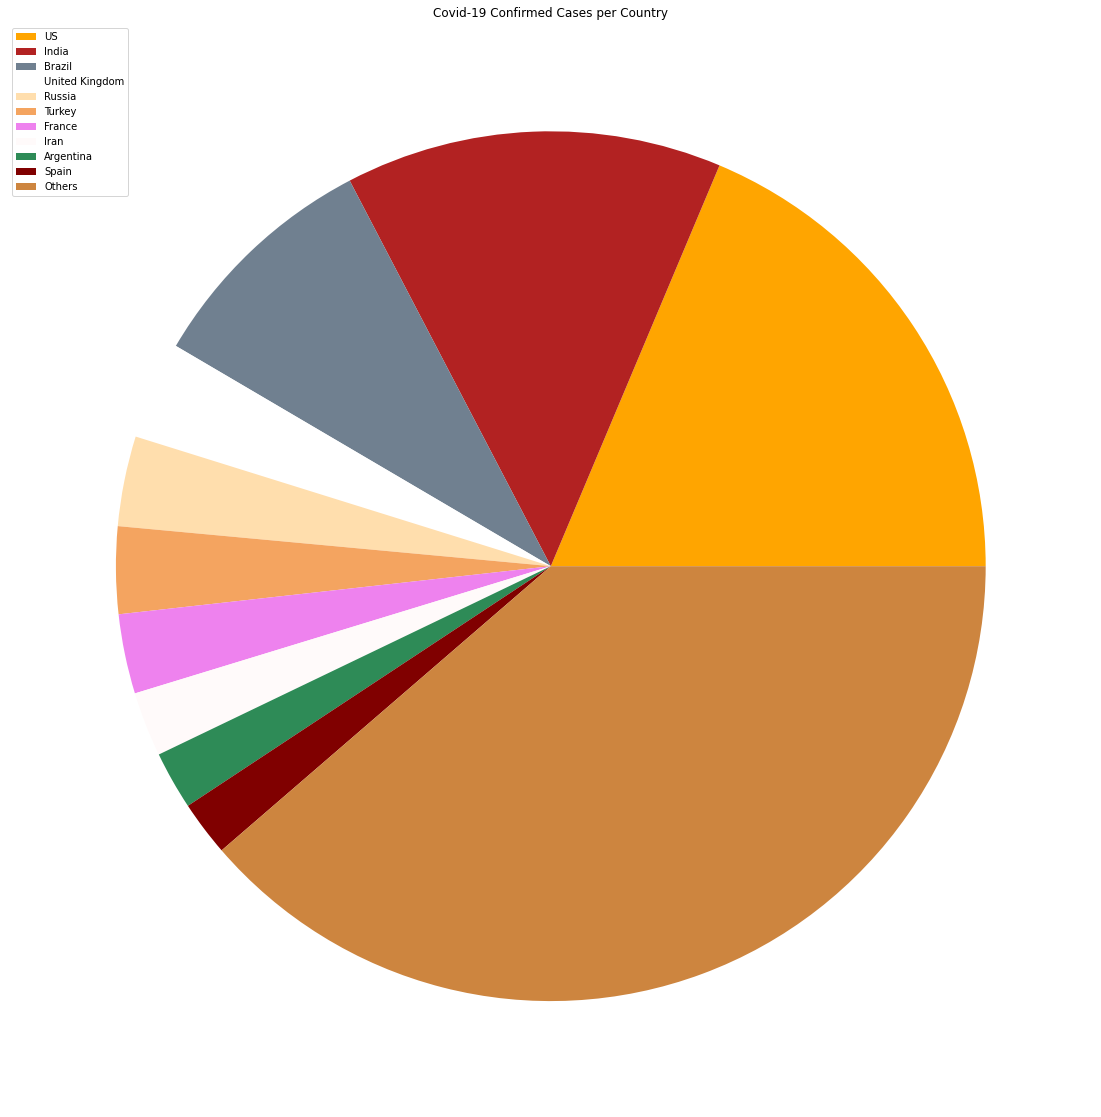

In [29]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

**Global Predictions**

In [30]:
# split data into train/test for global

start = datetime.date(2021, 1, 1)
today = datetime.date.today()
diff = today - start
days_to_skip = future_forecast[-1][0] - (100 or diff.days)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.20, random_state=42)

In [31]:
# Building the SVM model

# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [32]:
# svm_search.best_params_

In [33]:
svm_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, C=0.01)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 1743079.9065776388
MSE: 4170849936933.03
RMSE: 2042265.883016467
R-squared score for train: 0.9825651810879288
Adjusted R-squared score for train: 0.9823692842462202
R-squared score for test: 0.979334346049134
Adjusted R-squared score for test: 0.9791021476901356
Cross Validation Score: -1.6336


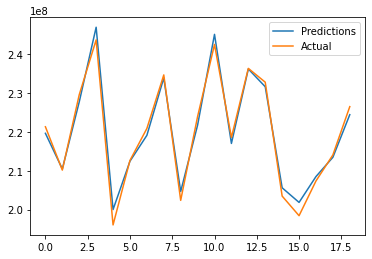

In [34]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
train_adjusted_r2 = 1 - (1-svm_confirmed.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
test_adjusted_r2 = 1 - (1-svm_confirmed.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, svm_test_pred))
print('MSE:', mean_squared_error(y_test_confirmed, svm_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, svm_test_pred)))
print('R-squared score for train:', svm_confirmed.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', svm_confirmed.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(svm_confirmed, days_since_1_22[days_to_skip:], world_cases[days_to_skip:].ravel(), cv=5)), 4))

In [35]:
# Confirmed vs Predicted cases

# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'SVM predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [36]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('10/27/2021', 248778898.2913433),
 ('10/28/2021', 249399310.48081443),
 ('10/29/2021', 250021649.41466817),
 ('10/30/2021', 250645918.08010623),
 ('10/31/2021', 251272119.46433255),
 ('11/01/2021', 251900256.55454245),
 ('11/02/2021', 252530332.33793744),
 ('11/03/2021', 253162349.80171952),
 ('11/04/2021', 253796311.93309245),
 ('11/05/2021', 254432221.71924958)}

In [37]:
# Using Linear regression model to make predictions

linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)

MAE: 4079653.683717276
MSE: 24708924279199.57
RMSE: 4970807.205997791
R-squared score for train: 0.8940416639500676
Adjusted R-squared score for train: 0.8928511208483829
R-squared score for test: 0.8775726563234809
Adjusted R-squared score for test: 0.876197068192284
Cross Validation Score: -3.1903


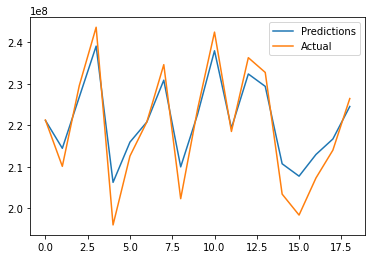

In [38]:
plt.plot(test_linear_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
train_adjusted_r2 = 1 - (1-linear_model.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
test_adjusted_r2 = 1 - (1-linear_model.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, test_linear_pred))
print('MSE:', mean_squared_error(y_test_confirmed, test_linear_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, test_linear_pred)))
print('R-squared score for train:', linear_model.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', linear_model.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model, days_since_1_22[days_to_skip:], world_cases[days_to_skip:], cv=5)), 4))

In [39]:
# r^2 score for LR

r2_score(y_test_confirmed, test_linear_pred)

0.8775726563234809

In [40]:
# cross validation score for LR

round(np.mean(cross_val_score(linear_model, days_since_1_22[days_to_skip:], world_cases[days_to_skip:], cv=5)), 4)

-3.1903

In [41]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [42]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[2.40246211e+08]
 [2.40619264e+08]
 [2.40992317e+08]
 [2.41365370e+08]
 [2.41738423e+08]
 [2.42111477e+08]
 [2.42484530e+08]
 [2.42857583e+08]
 [2.43230636e+08]
 [2.43603689e+08]]


**Singapore Predictions**

In [43]:
# split data into train/test for Singapore

start = datetime.date(2021, 1, 1)
today = datetime.date.today()
diff = today - start
days_to_skip = future_forecast[-1][0] - (100 or diff.days)
X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:], test_size=0.20, random_state=42)

In [44]:
# play arnd with the below
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# c = [0.01, 0.1, 1]

svm_sg_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, C=0.01)
svm_sg_confirmed.fit(X_train_sg_confirmed, y_train_sg_confirmed.ravel())
svm_sg_pred = svm_sg_confirmed.predict(future_forecast)

MAE: 13502.185081839549
MSE: 257936529.6617037
RMSE: 16060.402537349544
R-squared score for train: 0.7830688907105386
Adjusted R-squared score for train: 0.780631462516275
R-squared score for test: 0.7398123716915234
Adjusted R-squared score for test: 0.7368889151936753
Cross Validation Score: -1271.623


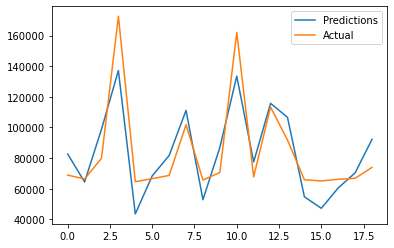

In [45]:
# check against testing data

svm_sg_test_pred = svm_sg_confirmed.predict(X_test_sg_confirmed)
plt.plot(svm_sg_test_pred, label="Predictions")
plt.plot(y_test_sg_confirmed, label="Actual")
plt.legend(loc="best")
train_adjusted_r2 = 1 - (1-svm_sg_confirmed.score(X_train_sg_confirmed, y_train_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
test_adjusted_r2 = 1 - (1-svm_sg_confirmed.score(X_test_sg_confirmed, y_test_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
print('MAE:', mean_absolute_error(y_test_sg_confirmed, svm_sg_test_pred))
print('MSE:', mean_squared_error(y_test_sg_confirmed, svm_sg_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_sg_confirmed, svm_sg_test_pred)))
print('R-squared score for train:', svm_sg_confirmed.score(X_train_sg_confirmed, y_train_sg_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', svm_sg_confirmed.score(X_test_sg_confirmed, y_test_sg_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(svm_sg_confirmed, days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:].ravel(), cv=5)), 4))

In [46]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_sg_pred[-10:]))

SVM future predictions:


{('10/27/2021', 140878.82560843223),
 ('10/28/2021', 142116.72333365673),
 ('10/29/2021', 143358.46546071762),
 ('10/30/2021', 144604.0579503178),
 ('10/31/2021', 145853.506753385),
 ('11/01/2021', 147106.81784111256),
 ('11/02/2021', 148363.99717217678),
 ('11/03/2021', 149625.05070179695),
 ('11/04/2021', 150889.98439222568),
 ('11/05/2021', 152158.80420678848)}

In [47]:
# Using Linear regression model to make predictions

linear_model_sg = LinearRegression(fit_intercept=False)
linear_model_sg.fit(X_train_sg_confirmed, y_train_sg_confirmed)
test_linear_pred_sg = linear_model_sg.predict(X_test_sg_confirmed)
linear_pred_sg = linear_model_sg.predict(future_forecast)

MAE: 24439.296808494015
MSE: 856426369.1509981
RMSE: 29264.76326832319
R-squared score for train: 0.19388988035977506
Adjusted R-squared score for train: 0.18483246328516578
R-squared score for test: 0.13609931054553426
Adjusted R-squared score for test: 0.1263925612258211
Cross Validation Score: -1044.1578


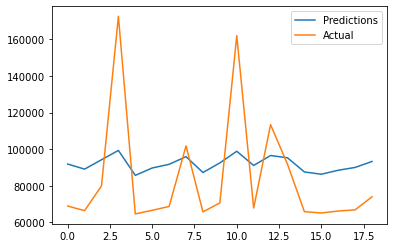

In [48]:
plt.plot(test_linear_pred_sg, label="Predictions")
plt.plot(y_test_sg_confirmed, label="Actual")
plt.legend(loc="best")
train_adjusted_r2 = 1 - (1-linear_model_sg.score(X_train_sg_confirmed, y_train_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
test_adjusted_r2 = 1 - (1-linear_model_sg.score(X_test_sg_confirmed, y_test_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
print('MAE:', mean_absolute_error(y_test_sg_confirmed, test_linear_pred_sg))
print('MSE:', mean_squared_error(y_test_sg_confirmed, test_linear_pred_sg))
print('RMSE:', np.sqrt(mean_squared_error(y_test_sg_confirmed, test_linear_pred_sg)))
print('R-squared score for train:', linear_model_sg.score(X_train_sg_confirmed, y_train_sg_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', linear_model_sg.score(X_test_sg_confirmed, y_test_sg_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model_sg, days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:], cv=5)), 4))

In [49]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred_sg[-10:])

Linear regression future predictions:
[[ 99762.37757297]
 [ 99917.28809715]
 [100072.19862133]
 [100227.10914552]
 [100382.0196697 ]
 [100536.93019388]
 [100691.84071806]
 [100846.75124224]
 [101001.66176642]
 [101156.57229061]]
